**Importing Libraries for House Price Prediction Model**
In this section, we import the necessary libraries that will be used throughout the project for data manipulation, visualization, and building the predictive model.

In [ ]:
mimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Data Preparation**
In this section, we load the data, select relevant features, and split the dataset into training and testing sets.

In [ ]:
train_data = pd.read_csv('C:/Users/sara/Desktop/train.csv')
test_data = pd.read_csv('C:/Users/sara/Desktop/test.csv')
sample_submission = pd.read_csv('C:/Users/sara/Desktop/sample_submission.csv')

In [ ]:
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
print(sample_submission.head())

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977


In [ ]:
print(test_data.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

**Data Cleaning for House Price Prediction**
In this section, we clean the training and test datasets by selecting only the relevant features necessary for our predictions

In [ ]:
# Keep only the relevant features
relevant_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']

# Drop all other features from the training data
train_data_cleaned = train_data[relevant_features].dropna()

# If you're working with test data for prediction, keep the same features minus SalePrice
test_data_cleaned = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']].dropna()

# Display the cleaned train data
print("Cleaned Training Data:")
print(train_data_cleaned.head())

# Display the cleaned test data (if applicable)
print("\nCleaned Test Data:")
print(test_data_cleaned.head())

**Model Training and Evaluation for House Price Prediction**
In this section, we load the dataset, clean it by selecting relevant features, split it into training and validation sets, and then train a linear regression model. Finally, we evaluate the model's performance.

In [ ]:
import pandas as pd

# Load your original dataset again if necessary
train_data = pd.read_csv(r'C:\Users\sara\Desktop\train.csv')  # Ensure the path is correct

# Select relevant features and clean the dataset
train_data_cleaned = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath',
                                   'LotArea', 'OverallQual', 'GarageArea',
                                   'YearBuilt', 'TotalBsmtSF', 'SalePrice']].dropna()

# Prepare features (X) and target variable (y)
X = train_data_cleaned[['GrLivArea', 'BedroomAbvGr', 'FullBath',
                         'LotArea', 'OverallQual', 'GarageArea',
                         'YearBuilt', 'TotalBsmtSF']]
y = train_data_cleaned['SalePrice']

# Split into training and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("New features added and data split into training and validation sets!")

# Initialize the OLS Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ols_model = LinearRegression()

# Train the model on the new training data
ols_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = ols_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"OLS Linear Regression Mean Squared Error with New Features: {mse}")
print(f"OLS Linear Regression R² Score with New Features: {r2}")


New features added and data split into training and validation sets!
OLS Linear Regression Mean Squared Error with New Features: 1510660168.6946366
OLS Linear Regression R² Score with New Features: 0.8030513790561942


**Feature Importance in House Price Prediction Model**
In this section, we analyze the importance of each feature used in the linear regression model by examining the coefficients assigned to them. Features with larger absolute coefficients are considered more influential in predicting the target variable (SalePrice).

In [ ]:
import numpy as np

# Coefficients of the features
coefficients = ols_model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
        Feature   Coefficient  Abs_Coefficient
4   OverallQual  20993.915752     20993.915752
1  BedroomAbvGr  -6437.420622      6437.420622
2      FullBath  -1826.542055      1826.542055
6     YearBuilt    379.621142       379.621142
0     GrLivArea     54.683533        54.683533
5    GarageArea     42.200122        42.200122
7   TotalBsmtSF     17.783610        17.783610
3       LotArea      0.643161         0.643161


**Cross-Validation for Model Evaluation**
In this section, we use K-Fold Cross-Validation to assess the performance of the linear regression model. Cross-validation helps ensure that the model generalizes well to unseen data by evaluating it across different subsets of the dataset.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ols_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Errors:", -cv_scores)
print("Average Cross-Validation Mean Squared Error:", -cv_scores.mean())


Cross-Validation Mean Squared Errors: [9.25565746e+08 1.33464380e+09 1.60327238e+09 1.05814930e+09
 2.52978841e+09]
Average Cross-Validation Mean Squared Error: 1490283926.272803


**Residual Analysis**
In this section, we visualize the residuals (the differences between the actual and predicted sale prices) to assess the performance of the linear regression model. A proper residual analysis helps identify patterns that may indicate issues with the model.

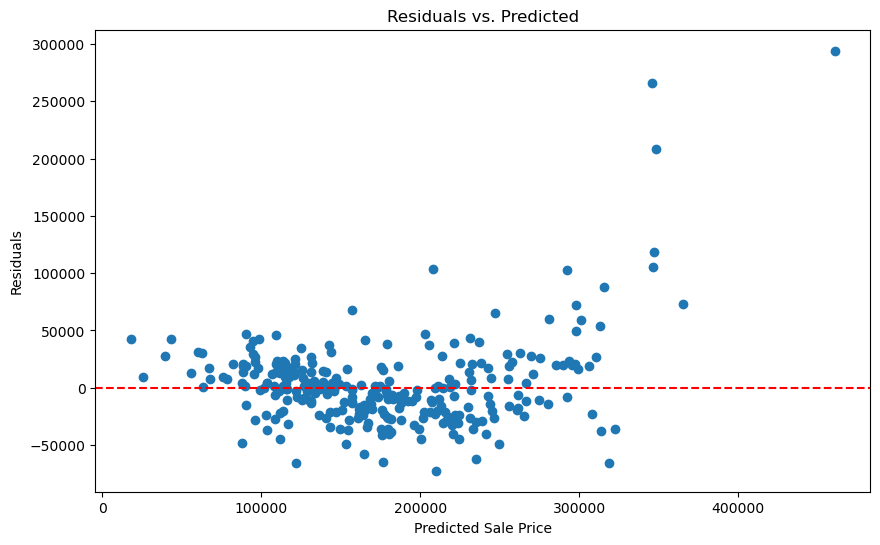

In [ ]:
import matplotlib.pyplot as plt

residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()


**Residual Analysis for House Price Prediction Model**
In this section, we perform a detailed residual analysis to evaluate the performance of our linear regression model. We visualize the residuals through a scatter plot and a histogram to check for patterns and normality.

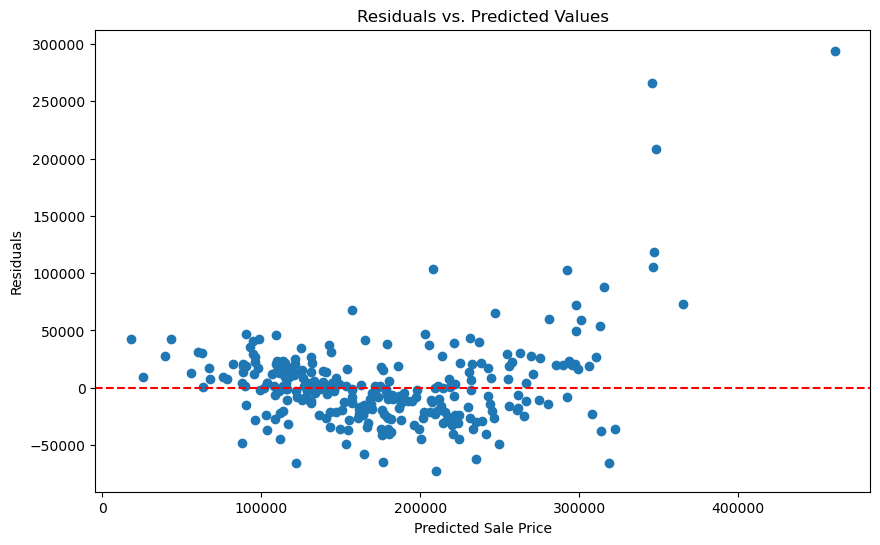

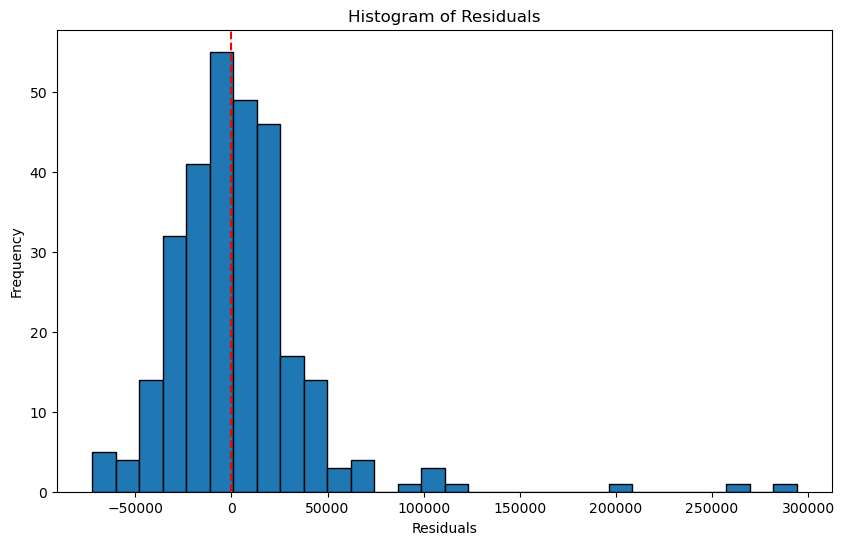

In [ ]:
import matplotlib.pyplot as plt

# Residuals calculation
residuals = y_val - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(x=0, color='red', linestyle='--')
plt.show()




**Model Evaluation and Prediction Visualization **
In this section, we evaluate the performance of the linear regression model by making predictions on the validation set. We then calculate the Mean Squared Error (MSE) and R² score, followed by a scatter plot to visualize the relationship between predicted and actual sale prices.

Mean Squared Error: 1510660168.6946366
R² Score: 0.8030513790561942


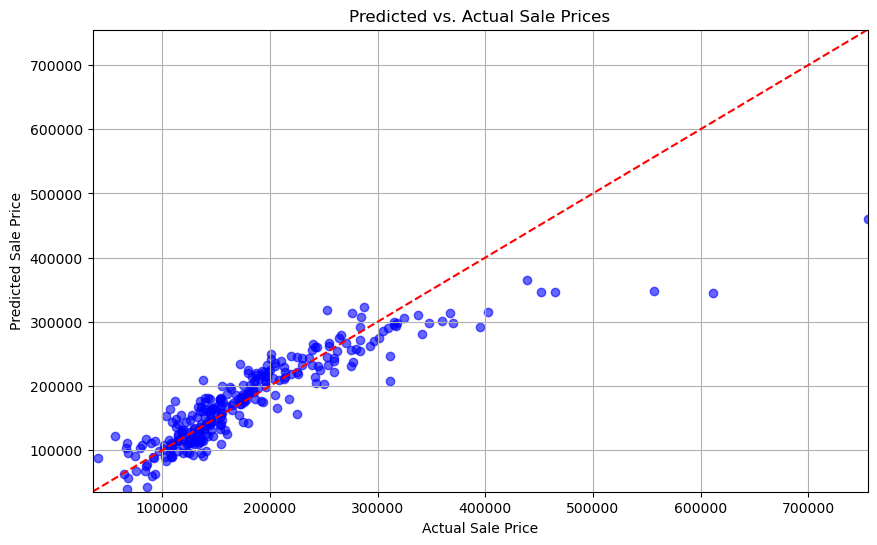

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Make Predictions on Validation Set
# Ensure you have your model trained and the validation set prepared
predictions = ols_model.predict(X_val)

# Step 2: Evaluate the Model
mse = mean_squared_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 3: Scatter Plot of Predicted vs. Actual Sale Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, predictions, color='blue', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Predicted vs. Actual Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.xlim([y_val.min(), y_val.max()])
plt.ylim([y_val.min(), y_val.max()])
plt.grid(True)
plt.show()




**Distribution of Actual vs. Predicted Sale Prices**
In this section, we visualize the distribution of actual and predicted sale prices using histograms. This helps us assess how closely the predicted values align with the actual values in terms of distribution.

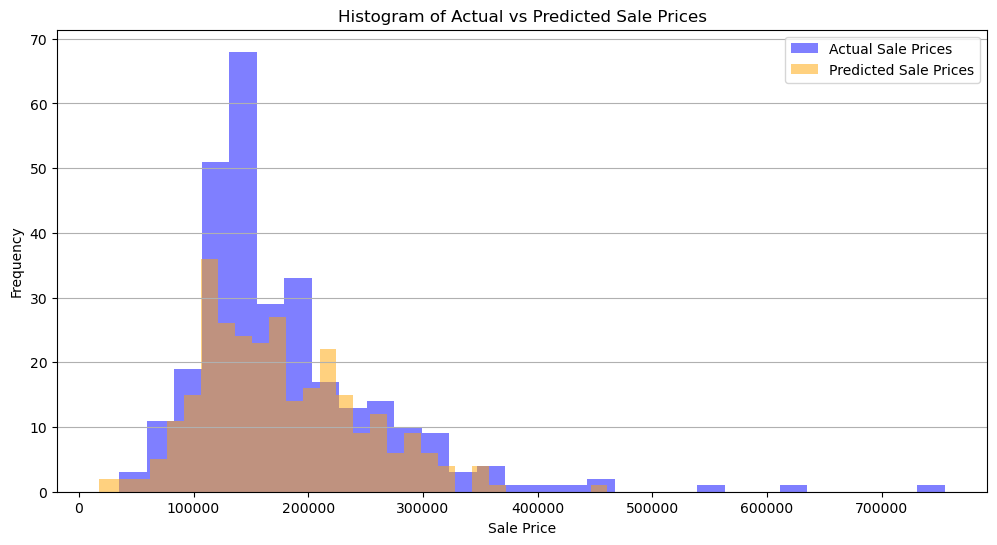

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Prepare the figure
plt.figure(figsize=(12, 6))

# Step 2: Plot histogram for actual sale prices
plt.hist(y_val, bins=30, alpha=0.5, color='blue', label='Actual Sale Prices')

# Step 3: Plot histogram for predicted sale prices
plt.hist(predictions, bins=30, alpha=0.5, color='orange', label='Predicted Sale Prices')

# Step 4: Add titles and labels
plt.title('Histogram of Actual vs Predicted Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()

# Step 5: Show the plot
plt.grid(axis='y')
plt.show()


**Making Predictions on New Data**
In this section, we create a new DataFrame containing sample house features and use the trained linear regression model to predict their sale prices.

In [ ]:
new_data = pd.DataFrame({
    'GrLivArea': [1500, 2000],
    'BedroomAbvGr': [3, 4],
    'FullBath': [2, 3],
    'LotArea': [7500, 8000],
    'OverallQual': [5, 7],
    'GarageArea': [400, 500],
    'YearBuilt': [2000, 2010],
    'TotalBsmtSF': [1000, 1200]
})

# Make predictions
new_predictions = ols_model.predict(new_data)
print("Predicted Sale Prices for New Data:")
print(new_predictions)


Predicted Sale Prices for New Data:
[159572.14393415 232532.30518142]


**Model Training and Validation**
In this section, we split the dataset into training and validation sets to assess the performance of the linear regression model. We then train the model and evaluate its accuracy using Mean Squared Error (MSE) and R² score.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
ols_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = ols_model.predict(X_val)

# Evaluate the model
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error: {mse_val}")
print(f"Validation R² Score: {r2_val}")


Validation Mean Squared Error: 1510660168.6946366
Validation R² Score: 0.8030513790561942


**Preparing the Test Data for Prediction**
In this section, we check the length of the original test dataset, prepare it by selecting relevant features, and remove any rows that contain missing values.

In [ ]:
# Check the number of rows in the original test data
print("Original Test Data Length:", len(test_data))

# Prepare the cleaned test data
test_data_cleaned = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath',
                                 'LotArea', 'OverallQual', 'GarageArea',
                                 'YearBuilt', 'TotalBsmtSF']]

# Check for missing values and drop them
print("Test Data Length Before Dropping NaNs:", len(test_data_cleaned))
test_data_cleaned = test_data_cleaned.dropna()
print("Test Data Length After Dropping NaNs:", len(test_data_cleaned))


Original Test Data Length: 1459
Test Data Length Before Dropping NaNs: 1459
Test Data Length After Dropping NaNs: 1457


Loading and Cleaning Test Data
In this section, we load the test dataset, select the relevant features, drop any rows with missing values, and verify the shape of the original and cleaned test datasets.

In [ ]:
import pandas as pd

# Step 1: Load your test data
test_data = pd.read_csv(r'C:\Users\sara\Desktop\test.csv')  # Adjust the path as necessary

# Step 2: Select relevant features
test_data_cleaned = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath',
                                 'LotArea', 'OverallQual', 'GarageArea',
                                 'YearBuilt', 'TotalBsmtSF']]

# Step 3: Drop rows with NaN values
test_data_cleaned = test_data_cleaned.dropna()

# Step 4: Verify the result
print("Shape of original test data:", test_data.shape)
print("Shape of cleaned test data:", test_data_cleaned.shape)


Shape of original test data: (1459, 80)
Shape of cleaned test data: (1457, 8)


In this section, we load the test dataset, select the relevant features used in the training model, and ensure that any rows with missing values are removed.



In [ ]:
# Load your test data
test_data = pd.read_csv(r'C:\Users\sara\Desktop\test.csv')  # Adjust path as necessary

# Select relevant features (same as used in training)
test_data_cleaned = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath',
                                 'LotArea', 'OverallQual', 'GarageArea',
                                 'YearBuilt', 'TotalBsmtSF']]

# Make sure to drop any rows with missing values if necessary
test_data_cleaned = test_data_cleaned.dropna()

print("Test data prepared with relevant features!")


Test data prepared with relevant features!


**Making Predictions on Test Data**
In this section, we load the test dataset, clean it by selecting relevant features, and make predictions using the trained linear regression model. Finally, we save the predicted results to a CSV file

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load your original test data
test_data = pd.read_csv(r'C:\Users\sara\Desktop\test.csv')  # Adjust the path as necessary

# Step 2: Select relevant features
test_data_cleaned = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath',
                                 'LotArea', 'OverallQual', 'GarageArea',
                                 'YearBuilt', 'TotalBsmtSF']]

# Step 3: Drop rows with NaN values
test_data_cleaned = test_data_cleaned.dropna()

# Step 4: Check the shape of the cleaned test data
print("Shape of original test data:", test_data.shape)
print("Shape of cleaned test data:", test_data_cleaned.shape)

# Step 5: Prepare features for prediction (using the same model trained earlier)
# Assuming 'ols_model' is already trained on your training dataset
# If not, ensure to train your model again on the training data
# Example: ols_model.fit(X_train, y_train)

# Step 6: Use the trained model to make predictions on the cleaned test data
predicted_prices = ols_model.predict(test_data_cleaned)

# Step 7: Create a DataFrame to hold the results
predicted_results = pd.DataFrame({
    'Id': test_data['Id'].iloc[test_data_cleaned.index],  # Ensure IDs correspond to the cleaned test data
    'Predicted Sale Price': predicted_prices
})

# Step 8: Display the first few predictions
print(predicted_results.head())

# Step 9: Save the predictions to a CSV file
predicted_results.to_csv(r'C:\Users\sara\Desktop\predictions.csv', index=False)
print("Predictions saved to predictions.csv!")



Shape of original test data: (1459, 80)
Shape of cleaned test data: (1457, 8)
     Id  Predicted Sale Price
0  1461         134480.711851
1  1462         163587.096329
2  1463         171738.654778
3  1464         188725.678915
4  1465         221771.902767
Predictions saved to predictions.csv!
